# DATA COLLECTING AND PREPARATION

In [127]:
import kagglehub

DATASET_PATH = kagglehub.dataset_download("harlfoxem/housesalesprediction")

In [128]:
# DATA PACKAGE
import pandas as pd
import numpy as np

# VISUALIZATION PACKAGE
import matplotlib.pyplot as plt
import seaborn as sns

# ML PACKAGE
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# DATA PREPROCESSING

## input data

In [129]:
df = pd.read_csv(DATASET_PATH + "/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


memilih fitur yang digunakan yaitu sqft_living dan price. id diambil untuk mengatasi duplikat data

In [7]:
df_selected = df[['id', 'sqft_living', 'price']]
df_selected

,id,sqft_living,price
0,7129300520,1180,221900.0
1,6414100192,2570,538000.0
2,5631500400,770,180000.0
3,2487200875,1960,604000.0
4,1954400510,1680,510000.0
...,...,...,...
21608,263000018,1530,360000.0
21609,6600060120,2310,400000.0
21610,1523300141,1020,402101.0
21611,291310100,1600,400000.0


In [57]:
df_selected.describe()

,id,sqft_living,price
count,2.143600e+04,21436.000000,2.143600e+04
mean,4.580765e+09,2082.704936,5.405293e+05
std,2.876590e+09,919.146469,3.676893e+05
min,1.000102e+06,290.000000,7.500000e+04
25%,2.123700e+09,1430.000000,3.221500e+05
50%,3.904921e+09,1920.000000,4.500000e+05
75%,7.308675e+09,2550.000000,6.450000e+05
max,9.900000e+09,13540.000000,7.700000e+06


karena hanya akan menggunakan singe feature, maka kita lakukan analisis correalation untuk mendapatkan insight cepat

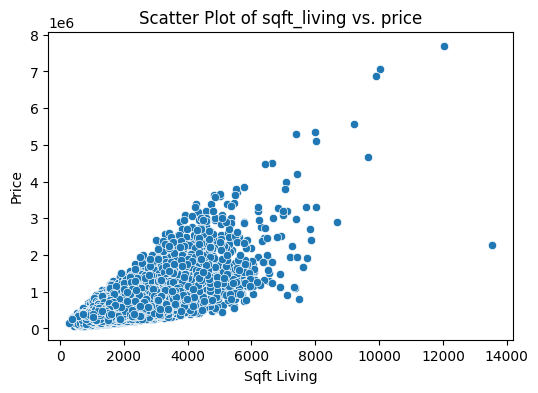

correalation between price and sqft_living is: 0.7019931774807706


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = df_selected['sqft_living'].corr(df_selected['price'])

plt.figure(figsize=(6, 4))
sns.scatterplot(x='sqft_living', y='price', data=df_selected)
plt.title('Scatter Plot of sqft_living vs. price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

print(f'correalation between price and sqft_living is: {correlation}')

## data cleaning

remove duplicated and null values

In [9]:
duplicated = df_selected[df_selected.duplicated(['id'])]
duplicated

,id,sqft_living,price
94,6021501535,1580,700000.0
314,4139480200,4290,1400000.0
325,7520000520,1240,240500.0
346,3969300030,1000,239900.0
372,2231500030,2180,530000.0
...,...,...,...
20181,7853400250,2910,645000.0
20613,2724049222,1000,220000.0
20670,8564860270,2680,502000.0
20780,6300000226,1200,380000.0


In [10]:
df_selected.drop_duplicates(['id'], inplace=True)
df_selected.index.is_unique

<ipython-input-10-49cbf1820769>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.drop_duplicates(['id'], inplace=True)


True

In [11]:
df_selected.isnull().sum()

,0
id,0
sqft_living,0
price,0


handling outliers

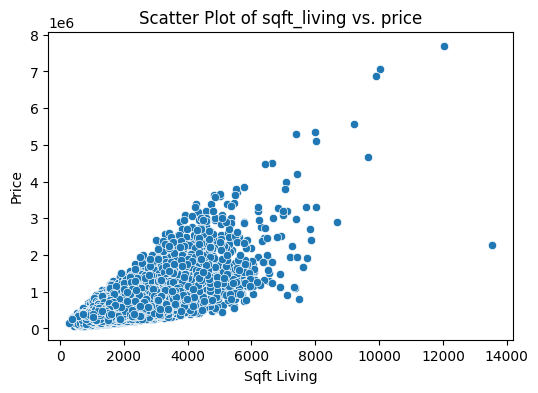

In [26]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='sqft_living', y='price', data=df_selected)
plt.title('Scatter Plot of sqft_living vs. price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

In [136]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df_selected['sqft_living']))
threshold = 12
# 3, 5, 10, 12
df_selected_clean = df_selected[z_scores < threshold]

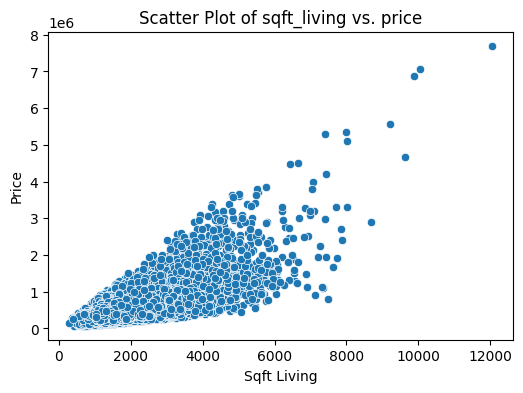

0.7021569498057078

In [137]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='sqft_living', y='price', data=df_selected_clean)
plt.title('Scatter Plot of sqft_living vs. price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

correlation = df_selected_clean['sqft_living'].corr(df_selected_clean['price'])
correlation

# MODEL FITTING

## transform data

In [114]:
X = df_selected_clean["sqft_living"].values
X = X.reshape(-1, 1)

y = df_selected_clean["price"].values

print(f'feature: {X}')
print(f'target: {y}')

feature: [[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]
target: [221900. 538000. 180000. ... 402101. 400000. 325000.]


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## fitting

In [116]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# MODEL EVALUATION

In [117]:
y_pred = model.predict(X_test)

In [118]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [119]:
print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)


Evaluasi Model:
Mean Squared Error (MSE): 62441935318.896034
R^2 Score: 0.47491801856850624


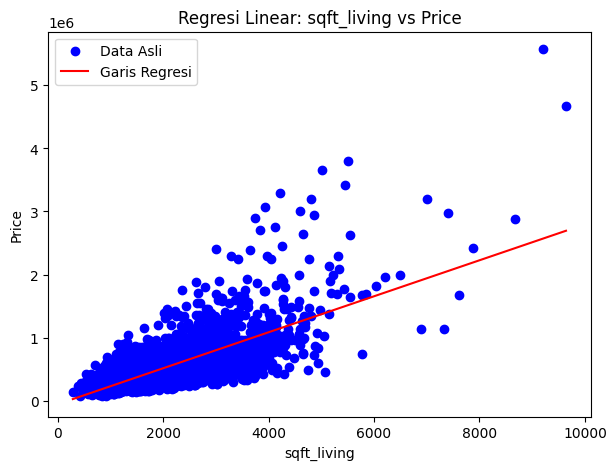

In [125]:
plt.figure(figsize=(7, 5))
plt.scatter(X_test, y_test, color='blue', label='Data Asli')
X_test_sorted, y_pred_sorted = zip(*sorted(zip(X_test[:, 0], y_pred)))
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Garis Regresi')
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.title("Regresi Linear: sqft_living vs Price")
plt.legend()
plt.show()